In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [162]:
features = np.load('x5-arsenal.npy')
lables = np.load('y5-arsenal.npy')
features.shape, lables.shape

((119, 50, 50), (119,))

In [183]:
X_train, X_test, y_train, y_test = train_test_split(features,lables,random_state=11)

In [184]:
X_train.shape[0], X_test.shape[0]

(89, 30)

In [195]:
tf.random.set_seed(11)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(50,50)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(5,activation=tf.keras.activations.softmax),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=500,validation_split=.2)

Epoch 1/500
3/3 [==============================] - 0s 65ms/step - loss: 1.6322 - accuracy: 0.1127 - val_loss: 1.6123 - val_accuracy: 0.2222
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5735 - accuracy: 0.3239 - val_loss: 1.5822 - val_accuracy: 0.2222
Epoch 3/500
3/3 [==============================] - 0s 15ms/step - loss: 1.5470 - accuracy: 0.2817 - val_loss: 1.5655 - val_accuracy: 0.2222
Epoch 4/500
3/3 [==============================] - 0s 14ms/step - loss: 1.5112 - accuracy: 0.3239 - val_loss: 1.5609 - val_accuracy: 0.2222
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 1.4905 - accuracy: 0.3662 - val_loss: 1.5678 - val_accuracy: 0.2778
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 1.4667 - accuracy: 0.4085 - val_loss: 1.5733 - val_accuracy: 0.3333
Epoch 7/500
3/3 [==============================] - 0s 15ms/step - loss: 1.4511 - accuracy: 0.3521 - val_loss: 1.5746 - val_accuracy: 0.2778
Epoch 8/500
3/3 [===

In [196]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.5459 - accuracy: 0.7667


[0.5458681583404541, 0.7666666507720947]

In [198]:
prob = model.predict(X_test)

sure = prob.max(axis=1)*100
sure = sure.round()
pred = prob.argmax(axis=1)
pred,sure , y_test

(array([3, 3, 1, 3, 0, 3, 4, 1, 4, 4, 1, 4, 4, 4, 1, 0, 0, 3, 3, 0, 3, 3,
        4, 2, 1, 4, 1, 0, 3, 1], dtype=int64),
 array([ 91., 100., 100., 100.,  76.,  91., 100.,  99.,  97., 100.,  40.,
        100., 100., 100.,  99.,  39.,  83.,  52.,  99.,  91.,  99.,  98.,
        100.,  61., 100.,  78.,  99.,  78., 100.,  99.], dtype=float32),
 array([3, 3, 1, 3, 0, 3, 4, 1, 4, 4, 1, 4, 4, 4, 0, 4, 1, 4, 3, 1, 3, 3,
        4, 2, 1, 2, 1, 1, 3, 1]))

In [199]:
class_name = ['leno','ramsdale','saka','smith_rowe','tavares']

In [200]:
def sample_predict(id,X_test,pred,y_test):
    plt.imshow(X_test[id],cmap='gray')
    plt.axis('off')
    if y_test[id] == pred[id]:
        color = 'blue'
    else:
        color = 'red'
    plt.title(f'Prediction / {class_name[pred[id]]} with {sure[id]}%',color=color)
    plt.show()

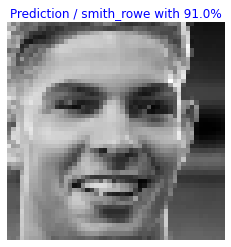

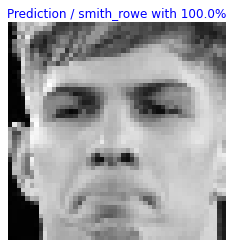

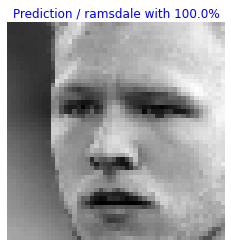

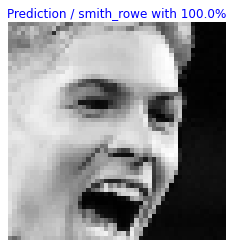

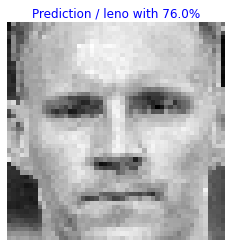

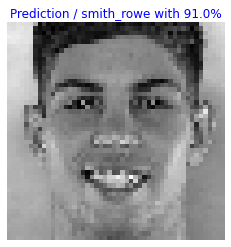

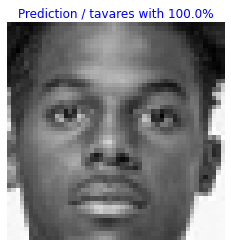

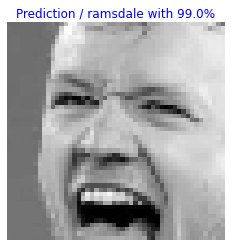

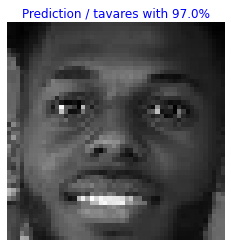

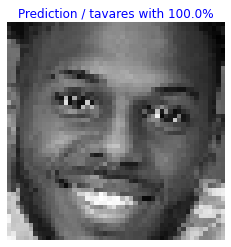

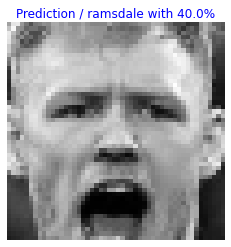

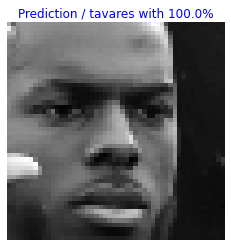

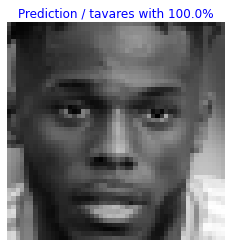

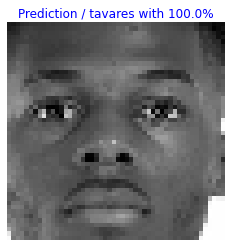

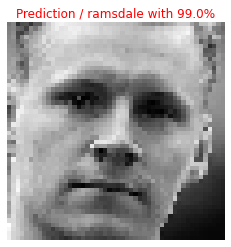

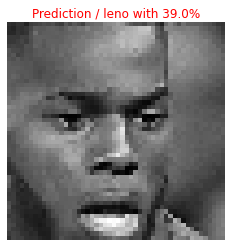

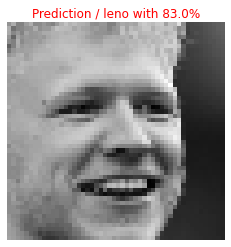

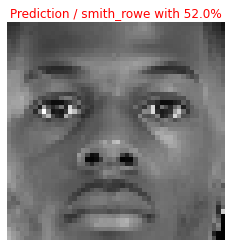

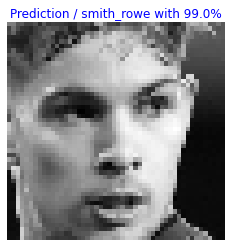

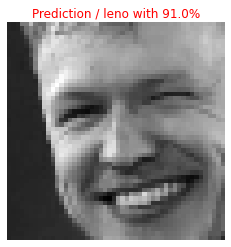

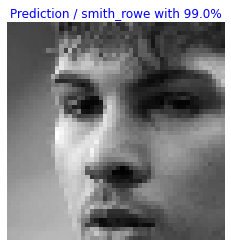

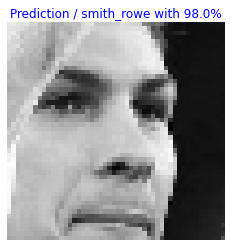

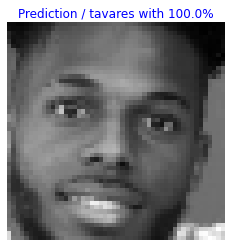

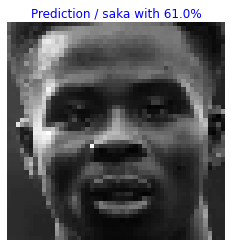

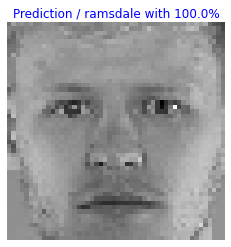

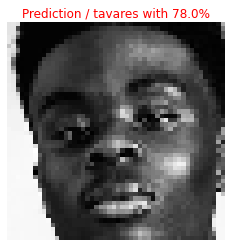

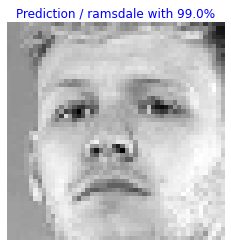

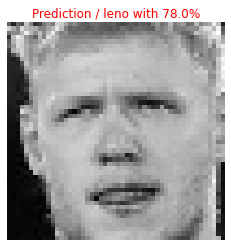

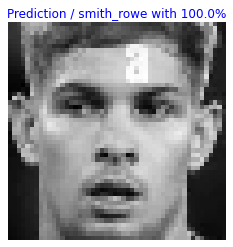

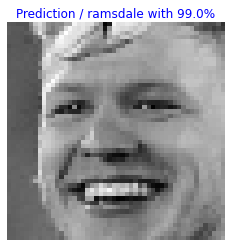

In [201]:
for _ in range(30):
    sample_predict(_,X_test,pred,y_test)

In [202]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

cm = confusion_matrix(y_test,pred)
cm

array([[1, 1, 0, 0, 0],
       [3, 6, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 8, 0],
       [1, 0, 0, 1, 7]], dtype=int64)

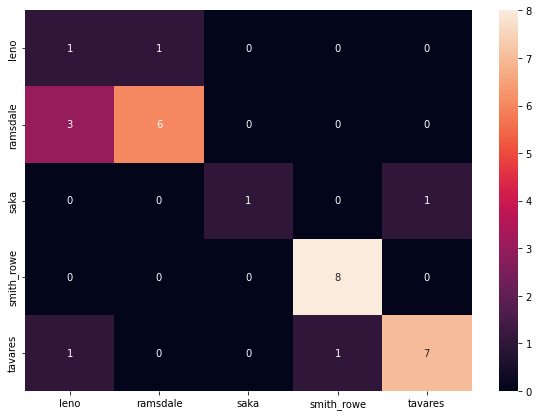

In [203]:
df_cm = pd.DataFrame(cm, index = class_name,columns = class_name)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm,annot=True, fmt='d')
plt.show()